In [28]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'scipy.stats.ecdf'

4. Sean 𝑋1, . . . , 𝑋𝑛 vaiid distribuidas como una Bernoulli 𝑝 para cierto 𝑝 ∈ (0, 1) y 𝑛 ∈ N. Fijado 𝛼 > 0, definimos 

In [3]:
def p_n(sample):
  return (1/(len(sample)-1))*sample.sum()

def epsilon_n(sample, alpha):
  return np.sqrt((1/(2*len(sample)))*np.log(2/alpha))

def intervalo_de_confianza(sample,alpha):
  pn = p_n(sample)
  en = epsilon_n(sample,alpha)
  return (pn-en , pn+en)

(a) Sean 𝛼 = 0.05 y 𝑝 = 0.4. Simular en la computadora para ver con qué frecuencia el intervalo
𝐶𝑛 contiene a 𝑝. Hacer esto para varios valores de 𝑛 entre 1 y 10000. Graficar la cobertura,
es decir la proporción de veces que el intervalo contiene a 𝑝, versus 𝑛.

Text(0, 0.5, 'cobertura - cant de veces que esat p en el intervalo')

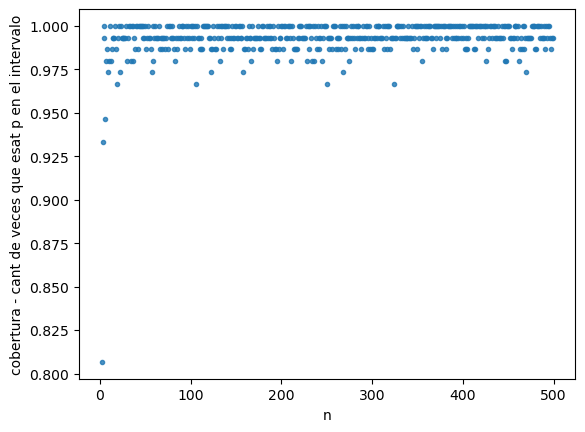

In [10]:
alpha = 0.05
p = 0.4

data = []

for n in range(2,500):
    coverage = 0
    for _ in range(150):
        sample = st.bernoulli.rvs(p = p, size = n)
        int = intervalo_de_confianza(sample, alpha)
        if int[0] < p < int[1]:
            coverage += 1
    coverage = coverage/150
    data.append(coverage)

plt.scatter(x=np.arange(2,500), y=data, alpha = 0.8, marker= ".")
plt.xlabel("n")
plt.ylabel("cobertura - cant de veces que esat p en el intervalo")

(b) Graficar la longitud del intervalo versus 𝑛. Supongamos que queremos que la longitud del
intervalo no sea más grande que 0.05. ¿Cuán grande debería ser 𝑛?

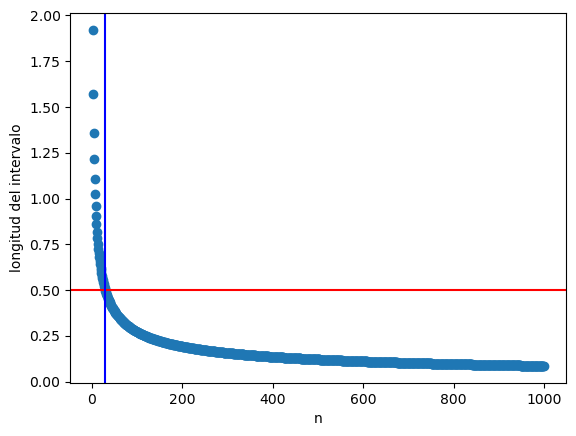

In [21]:
data = []
for n in range(2,1000):
  sample = st.bernoulli.rvs(p=p, size=n)
  interval_l = 2*epsilon_n(sample, alpha)
  data.append(interval_l)

plt.scatter(x=np.arange(2,1000), y=data)
plt.xlabel("n")
plt.ylabel("longitud del intervalo")
plt.axhline(y=0.5, color='r', linestyle='-')
plt.axvline(x=30, color='b', linestyle='-')

7) Generar 100 observaciones de una distribución N (0, 1) y calcular un intervalo de confianza del
95% para la función de distribución acumulada 𝐹 .
Repetir esto 1000 veces y calcular la cuántas veces el intervalo de confianza contiene la verdadera función de distribución.

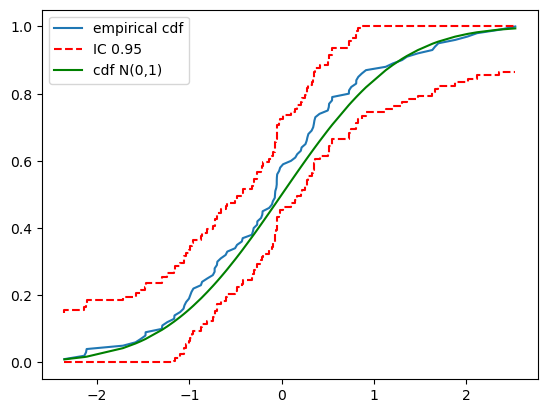

In [31]:
def confidence_interval_dkw(ecdf,alpha):  #calcula limites del intervalo con desigualdad de DKW
#ecdf: funcion acumulativa de distribucion
#alfa es el nivel de significancia del intervalo
  L = []
  U = []
  n = len(ecdf[0]) #cantidad de experimentos
  epsilon_n = np.sqrt(np.log(2/alpha)/(2*n))
  for i in range(0,n):
    L_i = np.max([ecdf[1][i]-epsilon_n,0]) #minimo del intervalo
    U_i = np.min([ecdf[1][i]+epsilon_n,1]) #maximo del intervalo
    L.append(L_i)
    U.append(U_i)
  return L,U

alpha= 0.05
sample = st.norm.rvs(loc= 0, scale=1, size=100) #genera 100 puntos aleatorios de una normal

x = np.sort(sample)
F = np.arange(1, len(sample) + 1) / len(sample)

plt.plot(x,F, label="empirical cdf") #plot cdf empirica

low, up = confidence_interval_dkw((x,F), alpha) #intervalos de confianza no parametricos DKW theorem
plt.step(x, low, "r--", label="IC 0.95")
plt.step(x, up, "r--")

plt.plot(x, st.norm.cdf(x), color="g", label="cdf N(0,1)") #real

plt.legend()


Repetir el ejercicio anterior para la distribución de Cauchy y la exponencial.

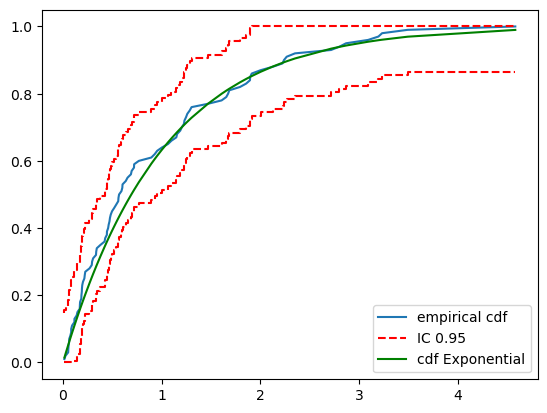

In [32]:
#exponencial
sample = st.expon.rvs( size=100)

x = np.sort(sample)
F = np.arange(1, len(sample) + 1) / len(sample)

plt.plot(x,F, label="empirical cdf") #plot cdf empirica

low, up = confidence_interval_dkw((x,F), alpha=.05) #intervalos de confianza no parametricos DKW theorem
plt.step(x, low, "r--", label="IC 0.95")
plt.step(x, up, "r--")

plt.plot(x, st.expon.cdf(x), color="g", label="cdf Exponential") #real

plt.legend()